# Predicting Car Prices using KNN

In [1]:
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm',
        'city-mpg', 'highway-mpg', 'price']

In [3]:
cars = pd.read_csv("imports-85.data", names=cols)

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

In [5]:
cars.iloc[0]

symboling                      3
normalized-losses              ?
make                 alfa-romero
fuel-type                    gas
aspiration                   std
num-of-doors                 two
body-style           convertible
drive-wheels                 rwd
engine-location            front
wheel-base                  88.6
length                     168.8
width                       64.1
height                      48.8
curb-weight                 2548
engine-type                 dohc
num-of-cylinders            four
engine-size                  130
fuel-system                 mpfi
bore                        3.47
stroke                      2.68
compression-rate               9
horsepower                   111
peak-rpm                    5000
city-mpg                      21
highway-mpg                   27
price                      13495
Name: 0, dtype: object

In [6]:
# Select only numeric columns and the target column is the price
num_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[num_cols]

In [7]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
# replace ? values into NaN
numeric_cars = numeric_cars.replace('?', np.nan).astype('float')

In [9]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [10]:
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [11]:
# drop rows with missing prices since we can't estimate target prices
numeric_cars.dropna(subset=["price"], inplace=True)

In [12]:
# fill missing values with the mean for each column
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [13]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [14]:
# separate the target column since we won't normalize it
price_col = numeric_cars["price"]
# normalize numeric columns from 0 to 1
numeric_cars = (numeric_cars - numeric_cars.min()) / (numeric_cars.max() - numeric_cars.min())
numeric_cars["price"] = price_col

In [15]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate Model
Let's run each feature with KNN and determine which features are best to use for multivariate.

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [17]:
def knn_train_test(feat_cols, target_col, df):
    # Setup K-Fold: 50-50 split
    X_train, X_test, y_train, y_test = train_test_split(df[[feat_cols]], df[target_col], test_size=0.5, random_state=7)
    
    # Setup KNN Model
    knn = KNeighborsRegressor()
    
    # Fit
    knn.fit(X_train, y_train)
    
    # Predict
    pred = knn.predict(X_test)
    
    # Measure MSE and RMSE
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    
    return rmse

In [18]:
# Retrieve feature columns
feat_cols = numeric_cars.columns.drop("price")
print(feat_cols)

Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg'],
      dtype='object')


In [19]:
# Fit each column into the model and store the result in a dictionary
results_dict = {}
for col in feat_cols:
    rmse = knn_train_test(col, 'price', numeric_cars)
    results_dict[col] = rmse
uni_results = pd.Series(results_dict)

In [20]:
uni_results.sort_values()

horsepower           3430.819790
width                3553.844284
curb-weight          4163.157305
highway-mpg          4229.685281
city-mpg             4660.722801
length               4827.776914
wheel-base           5752.948353
bore                 5822.921884
stroke               6737.441526
compression-rate     6815.443860
peak-rpm             6915.058012
normalized-losses    7419.645784
height               7762.600847
dtype: float64

From the univariate model, the top 5 results are horsepower, width, curb-weight, highway-mpg, and city-mpg. Let's use combinations of these features later for developing a multivariate model.

## Usage of different K Neighbors values for Univariate Model

In [21]:
def knn_train_test(train_cols, target_col, df, k, cv=2):
    # Setup KFold instance
    kf = KFold(cv, shuffle=True, random_state=7)
    
    # Setup KNN Model using specified k values
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Cross Validate and measure negative MSE
    neg_mses = cross_val_score(knn, df[[train_cols]], df[target_col], scoring='neg_mean_squared_error', cv=kf)
    
    # Compute MSE absolute value
    mses = np.absolute(neg_mses)
    
    # Compute RMSE
    rmses = np.sqrt(mses)
    
    # Return mean RMSE
    return rmses.mean()

In [22]:
k_tests = [1,3,5,7,9]
results_dict = {}

# Iterate all columns
for col in feat_cols:
    results_k_dict = {}
    for k in k_tests:
        rmse = knn_train_test(col, 'price', numeric_cars, k, 2)
        results_k_dict[k] = round(rmse, 2)
    sorted_rslt = collections.OrderedDict(sorted(results_k_dict.items()))
    results_dict[col] = sorted_rslt

In [23]:
results_dict

{'bore': OrderedDict([(1, 7386.06),
              (3, 7678.33),
              (5, 7187.69),
              (7, 6804.32),
              (9, 6435.84)]),
 'city-mpg': OrderedDict([(1, 5658.79),
              (3, 4504.71),
              (5, 4751.37),
              (7, 4800.03),
              (9, 4873.84)]),
 'compression-rate': OrderedDict([(1, 7511.83),
              (3, 6506.35),
              (5, 6625.55),
              (7, 7073.76),
              (9, 7303.88)]),
 'curb-weight': OrderedDict([(1, 5786.74),
              (3, 4488.97),
              (5, 4278.48),
              (7, 4293.42),
              (9, 4399.14)]),
 'height': OrderedDict([(1, 10131.41),
              (3, 8176.06),
              (5, 7558.3),
              (7, 7603.39),
              (9, 7548.14)]),
 'highway-mpg': OrderedDict([(1, 4937.46),
              (3, 4773.11),
              (5, 4506.47),
              (7, 4597.11),
              (9, 4616.7)]),
 'horsepower': OrderedDict([(1, 4433.98),
              (3, 4547.48),

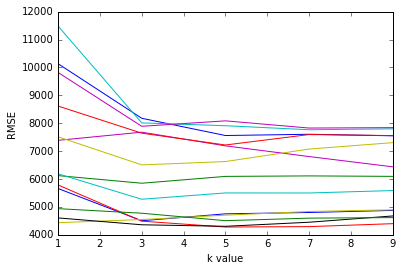

In [24]:
# Plot results:
for key, val in results_dict.items():
    x = list(val.keys())
    y = list(val.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

Experimenting different values for K Neighbors we can easily see from the top-5 features (e.g. width, curb-weight etc.) we've listed before that k with a value of 5 yields the lowest RMSE. Let's verify this by averaging all k per feature.

In [25]:
# Compute average RMSE across all K value per feature
avg_rmses = {}
for k,v in results_dict.items():
    avg_rmse = np.mean(list(v.values()))
    avg_rmses[k] = avg_rmse
result_avg_k_vals = pd.Series(avg_rmses)
result_avg_k_vals.sort_values()

width                4479.020
curb-weight          4649.350
horsepower           4683.288
highway-mpg          4686.170
city-mpg             4917.748
length               5609.158
wheel-base           6053.770
compression-rate     7004.274
bore                 7098.448
normalized-losses    7724.990
height               8203.460
stroke               8291.732
peak-rpm             8592.764
dtype: float64

Still, the top 5 features remain. For this reason, let's now use these features along with k=5 for training a multivariate KNN.

## Multivariate Model

In [26]:
def knn_train_test_multi(train_cols, target_col, df, k, cv=2):
    # Setup KFold instance
    kf = KFold(cv, shuffle=True, random_state=7)
    
    # Setup KNN Model using specified k values
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Cross Validate and measure negative MSE
    neg_mses = cross_val_score(knn, df[train_cols], df[target_col], scoring='neg_mean_squared_error', cv=kf)
    
    # Compute MSE absolute value
    mses = np.absolute(neg_mses)
    
    # Compute RMSE
    rmses = np.sqrt(mses)
    
    # Return mean RMSE
    return rmses.mean()

In [27]:
# All tests use k=5
results_multi_dict = {}

# Using 2 Features
top_2 = ["horsepower", "width"]
print(top_2)
rmse_2 = knn_train_test_multi(top_2, 'price', numeric_cars, 5, 2)
results_multi_dict["top_2"] = round(rmse_2, 4)

# Using 3 Features
top_3 = ["horsepower", "width", "curb-weight"]
rmse_3 = knn_train_test_multi(top_3, 'price', numeric_cars, 5, 2)
results_multi_dict["top_3"] = round(rmse_3, 4)

# Using 4 Features
top_4 = ["horsepower", "width", "curb-weight", "highway-mpg"]
rmse_4 = knn_train_test_multi(top_4, 'price', numeric_cars, 5, 2)
results_multi_dict["top_4"] = round(rmse_4, 4)

# Using 5 Features
top_5_cols = ["horsepower", "width", "curb-weight", "highway-mpg", "city-mpg"]
rmse_5 = knn_train_test_multi(top_5_cols, 'price', numeric_cars, 5, 2)
results_multi_dict["top_5"] = round(rmse_5, 4)

result_multi = pd.Series(results_multi_dict)
result_multi.sort_values()

['horsepower', 'width']


top_3    3511.7486
top_4    3577.5479
top_5    3618.4856
top_2    3778.4015
dtype: float64

Usage of multiple features lowered the error rate even more. However, we're still not satisfied with the output since we haven't exhausted our experiments. For now, let's try different values for K using multiple features.

In [28]:
feat_cols = [
    ["horsepower", "width"],
    ["horsepower", "width", "curb-weight"],
    ["horsepower", "width", "curb-weight", "highway-mpg"],
    ["horsepower", "width", "curb-weight", "highway-mpg", "city-mpg"]
]
k_tests = [k for k in range(1,26)]
results_dict_multi = {}

for cols in feat_cols:
    results_k_dict = {}
    for k in k_tests:
        rmse = knn_train_test_multi(cols, 'price', numeric_cars, k, 5)
        results_k_dict[k] = round(rmse,2)
    sorted_rslt = collections.OrderedDict(sorted(results_k_dict.items()))
    key_name = "top_" + str(len(cols))
    results_dict_multi[key_name] = sorted_rslt

In [29]:
results_dict_multi

{'top_2': OrderedDict([(1, 4150.87),
              (2, 3404.77),
              (3, 3207.81),
              (4, 3212.07),
              (5, 3333.03),
              (6, 3435.99),
              (7, 3548.3),
              (8, 3623.28),
              (9, 3598.36),
              (10, 3591.04),
              (11, 3656.37),
              (12, 3674.51),
              (13, 3770.67),
              (14, 3836.88),
              (15, 3895.15),
              (16, 3973.12),
              (17, 4018.79),
              (18, 4066.6),
              (19, 4114.46),
              (20, 4171.93),
              (21, 4216.4),
              (22, 4280.53),
              (23, 4331.75),
              (24, 4343.17),
              (25, 4350.05)]),
 'top_3': OrderedDict([(1, 2703.71),
              (2, 2859.1),
              (3, 2892.37),
              (4, 3064.52),
              (5, 2983.02),
              (6, 2999.66),
              (7, 3022.77),
              (8, 3109.03),
              (9, 3187.08),
              (1

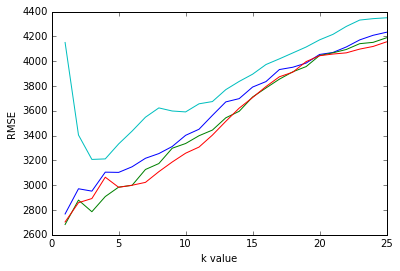

In [30]:
# Plot results:
for key, val in results_dict_multi.items():
    x = list(val.keys())
    y = list(val.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

In [31]:
# Compute average RMSE across all K value per feature
avg_rmses = {}
for k,v in results_dict_multi.items():
    avg_rmse = np.mean(list(v.values()))
    avg_rmses[k] = avg_rmse
result_avg_k_vals = pd.Series(avg_rmses)
result_avg_k_vals.sort_values()

top_3    3510.1456
top_4    3522.8208
top_5    3598.7556
top_2    3832.2360
dtype: float64

Using the top-3 features produced the best results. Interestingly, the lowest k value which is 1 yielded the lowest RMSE among different sets of top-n features. Unlike the others, using 2 features produced different results for the first k values (i.e 1-5). 